In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [2]:
# Height and width refer to the size of the image
# Channels refers to the amount of color channels (red, green, blue)

image_dimensions = {'height':256, 'width':256, 'channels':3}

In [3]:
# Create a Classifier class

class Classifier:
    def __init__():
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

In [4]:
# Create a MesoNet class using the Classifier

class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer,
                           loss = 'mean_squared_error',
                           metrics = ['accuracy'])
    
    def init_model(self): 
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)

In [5]:
# Instantiate a MesoNet model with pretrained weights
meso = Meso4()
meso.load('./weights/Meso4_DF')

In [6]:
# Prepare image data

# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
dataGenerator = ImageDataGenerator(rescale=1./255)

# Instantiating generator to feed images through the network
generator = dataGenerator.flow_from_directory(
    './data/',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

Found 7104 images belonging to 2 classes.


In [7]:
# Checking class assignment
generator.class_indices

{'DeepFake': 0, 'Real': 1}

In [8]:
# '.ipynb_checkpoints' is a *hidden* file Jupyter creates for autosaves
# It must be removed for flow_from_directory to work.
!rmdir /s /q c:data\.ipynb_checkpoints

# Equivalent command in Unix (for Mac / Linux users)
# !rm -r /Users/mikhaillenko/mesonet/mesonet/data/.ipynb_checkpoints/

The system cannot find the file specified.


In [9]:
# Recreating generator after removing '.ipynb_checkpoints'
dataGenerator = ImageDataGenerator(rescale=1./255)

generator = dataGenerator.flow_from_directory(
    './data/',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

# Re-checking class assignment after removing it
generator.class_indices

Found 7104 images belonging to 2 classes.


{'DeepFake': 0, 'Real': 1}

1/1 [==============================] - 3s 3s/step
Predicted likelihood: 0.9909
Actual label: 1
1/1 [==============================] - 0s 124ms/step

Correct prediction: True


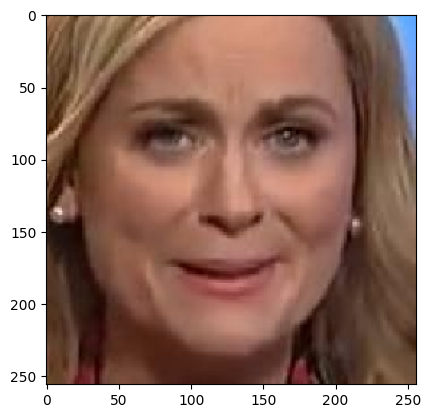

In [10]:
# Rendering image X with label y for MesoNet
X, y = generator.next()

# Evaluating prediction
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(meso.predict(X)[0][0])==y[0]}")

# Showing image
plt.imshow(np.squeeze(X));

In [11]:
# Creating separate lists for correctly classified and misclassified images
correct_real = []
correct_real_pred = []

correct_deepfake = []
correct_deepfake_pred = []

misclassified_real = []
misclassified_real_pred = []

misclassified_deepfake = []
misclassified_deepfake_pred = []

In [12]:
# Generating predictions on validation set, storing in separate lists
for i in range(len(generator.labels)):
    
    # Loading next picture, generating prediction
    X, y = generator.next()
    pred = meso.predict(X)[0][0]
    
    # Sorting into proper category
    if round(pred)==y[0] and y[0]==1:
        correct_real.append(X)
        correct_real_pred.append(pred)
    elif round(pred)==y[0] and y[0]==0:
        correct_deepfake.append(X)
        correct_deepfake_pred.append(pred)
    elif y[0]==1:
        misclassified_real.append(X)
        misclassified_real_pred.append(pred)
    else:
        misclassified_deepfake.append(X)
        misclassified_deepfake_pred.append(pred)   
        
    # Printing status update
    if i % 1000 == 0:
        print(i, ' predictions completed.')
    
    if i == len(generator.labels)-1:
        print("All", len(generator.labels), "predictions completed")

1/1 [==============================] - 0s 45ms/step
0  predictions completed.
1/1 [==============================] - 0s 62ms/step
1000  predictions completed.
1/1 [==============================] - 0s 46ms/step
2000  predictions completed.
1/1 [==============================] - 0s 82ms/step
3000  predictions completed.
1/1 [==============================] - 0s 102ms/step
4000  predictions completed.
1/1 [==============================] - 0s 147ms/step
5000  predictions completed.
1/1 [==============================] - 0s 160ms/step
6000  predictions completed.
1/1 [==============================] - 0s 183ms/step
7000  predictions completed.
1/1 [==============================] - 0s 170ms/step
All 7104 predictions completed


In [14]:
def plotter(images,preds):
    fig = plt.figure(figsize=(16,9))
    subset = np.random.randint(0, len(images)-1, 12)
    for i,j in enumerate(subset):
        fig.add_subplot(3,4,i+1)
        plt.imshow(np.squeeze(images[j]))
        plt.xlabel(f"Model confidence: \n{preds[j]:.4f}")
        plt.tight_layout()
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
    plt.show;
    return

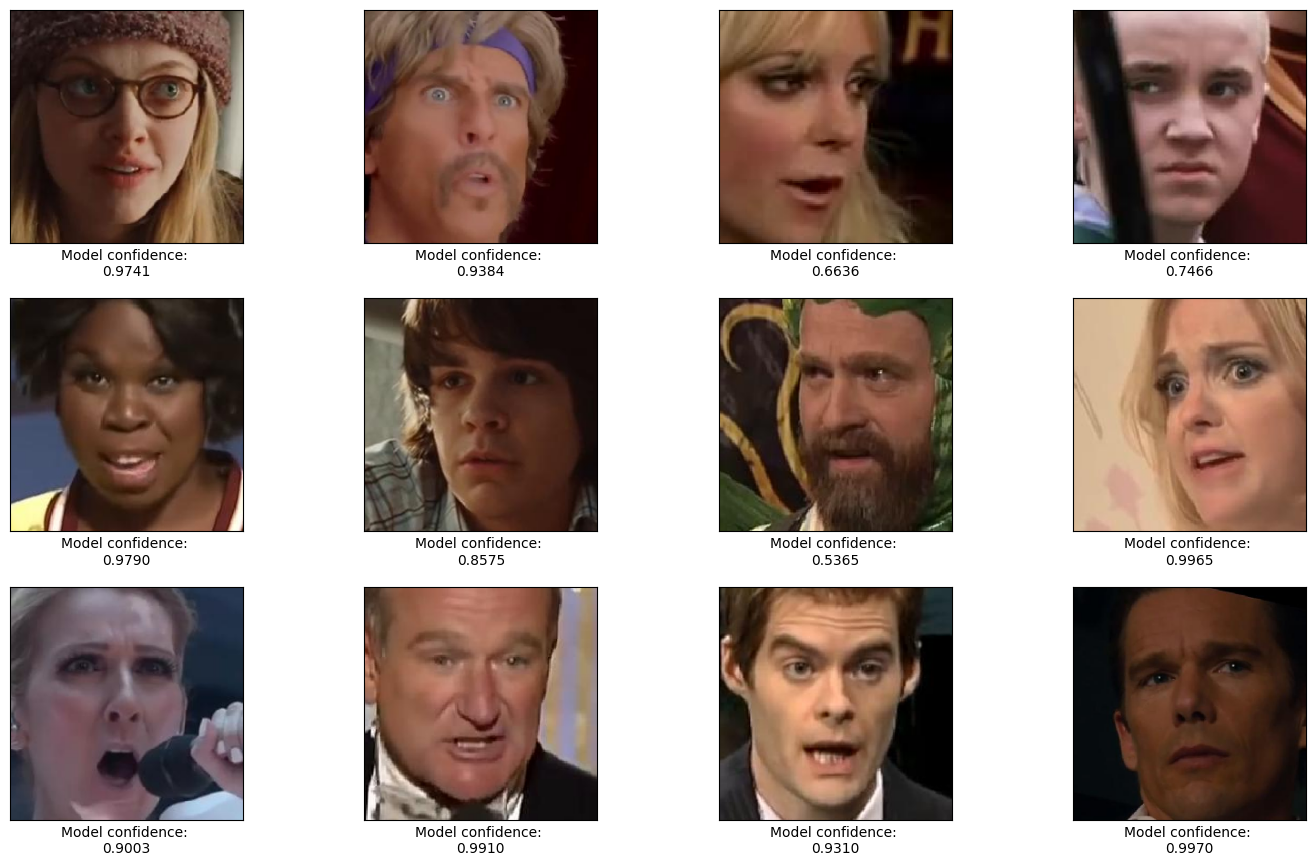

In [15]:
plotter(correct_real, correct_real_pred)

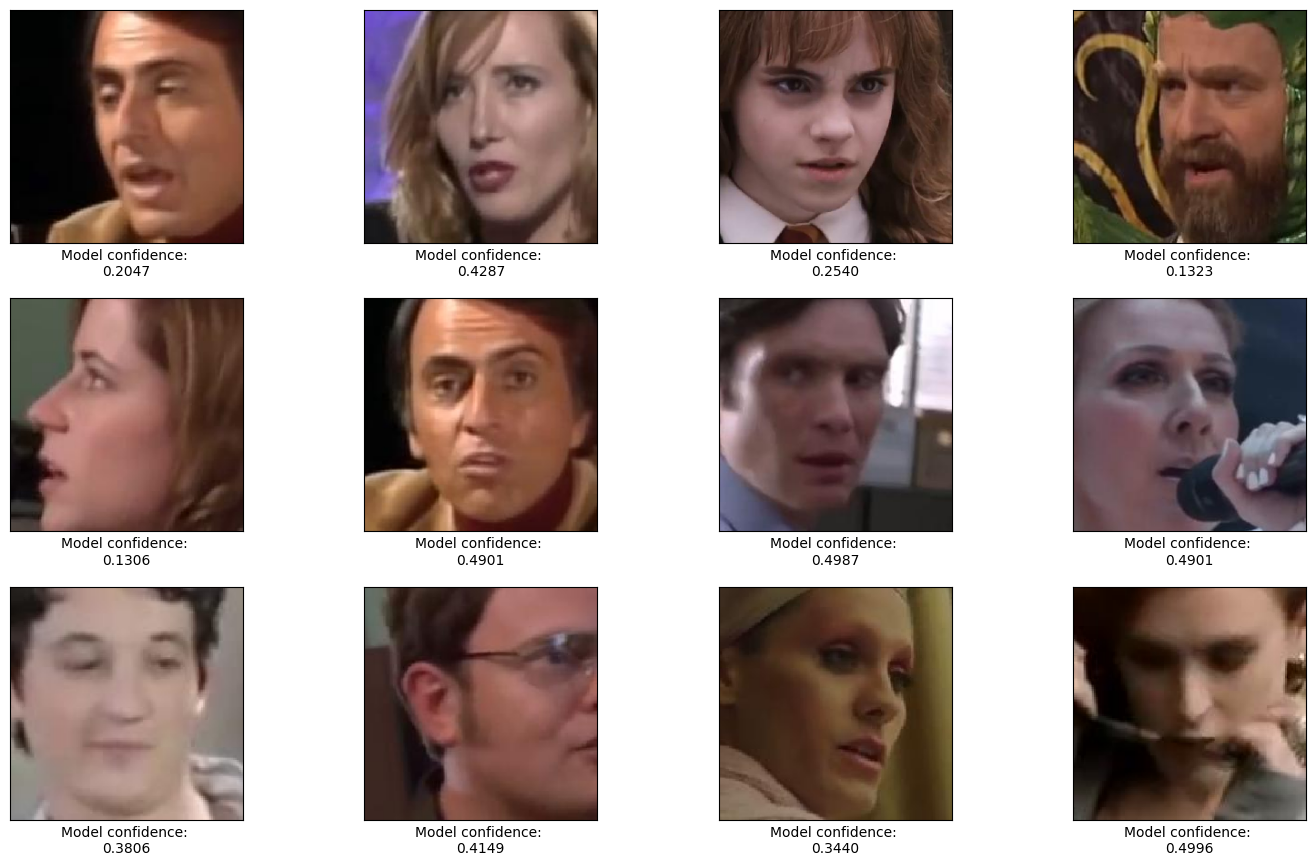

In [16]:
plotter(misclassified_real, misclassified_real_pred)

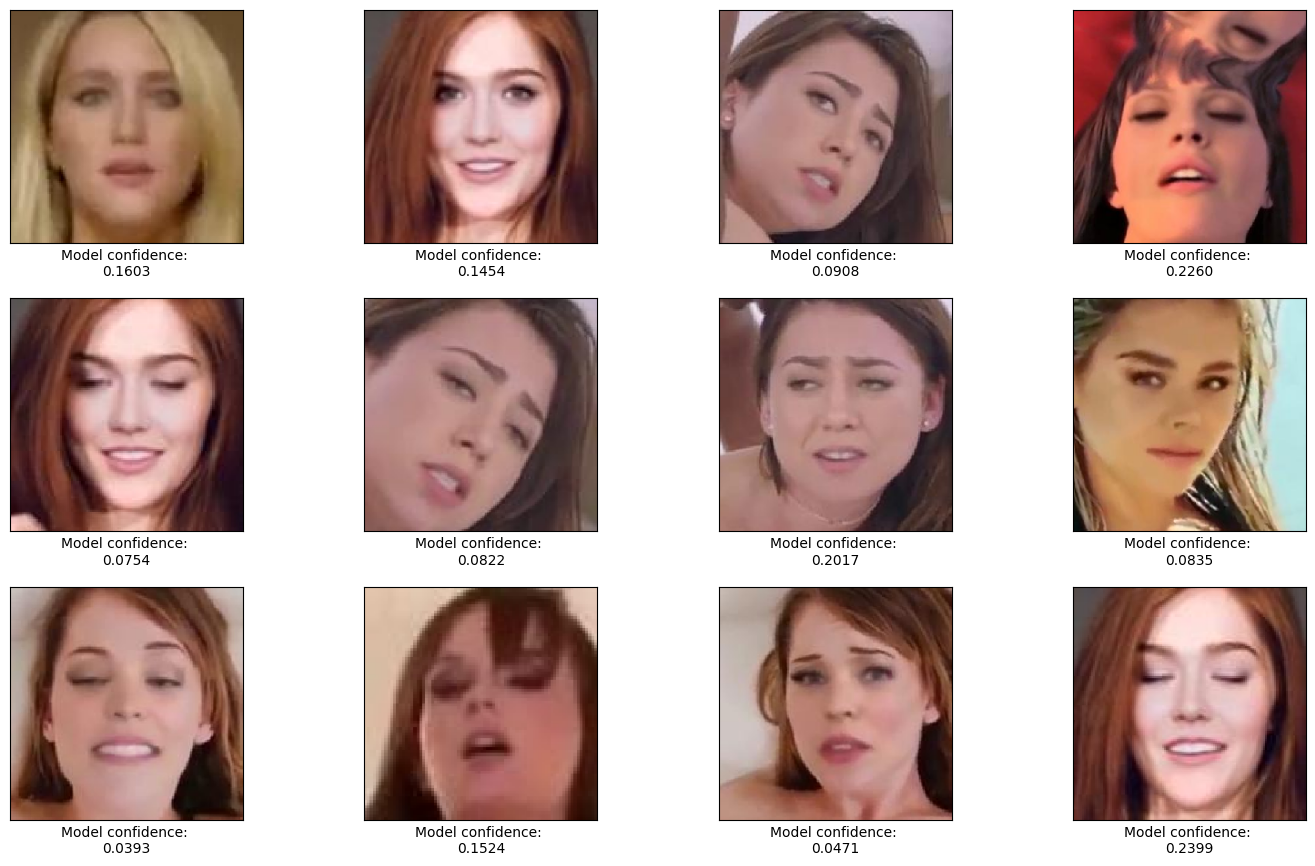

In [17]:
plotter(correct_deepfake, correct_deepfake_pred)

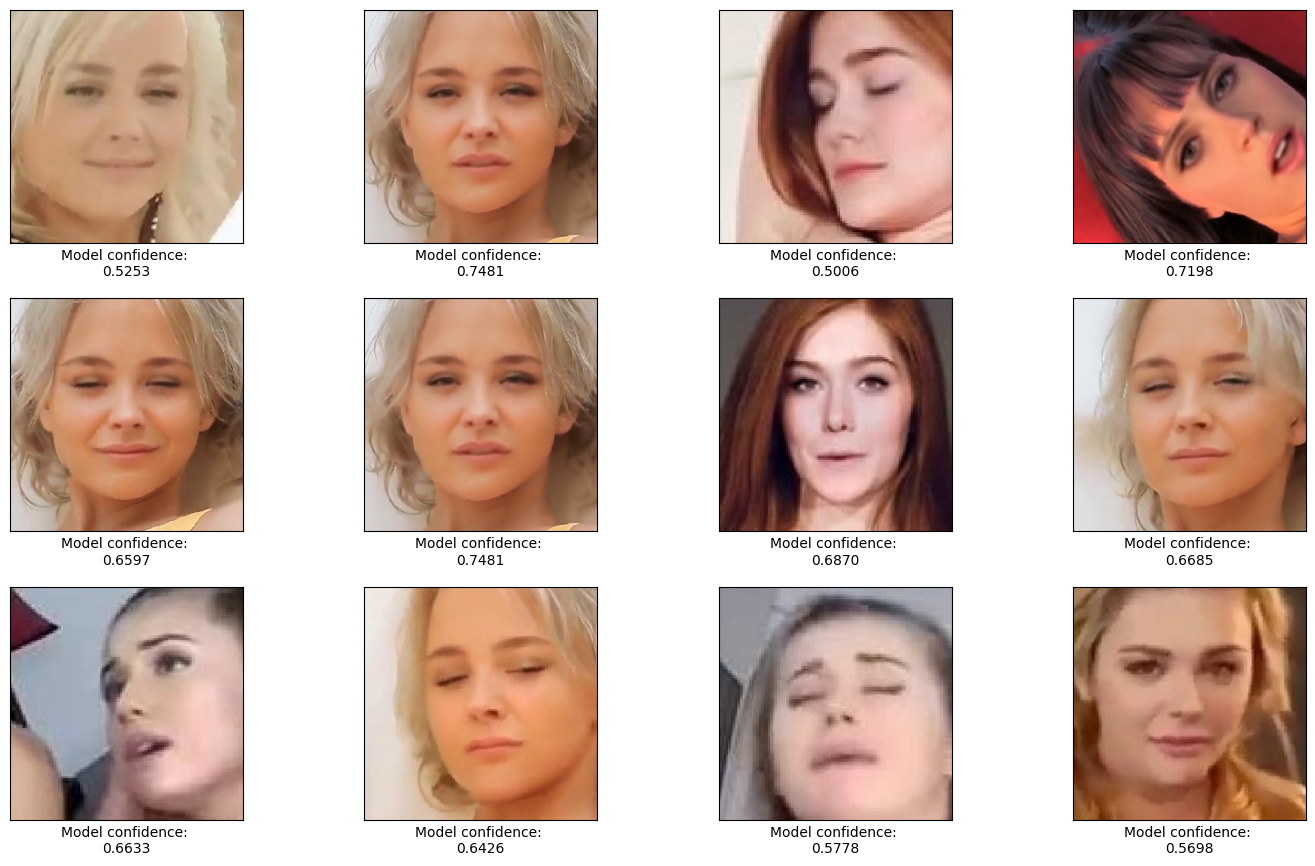

In [18]:
plotter(misclassified_deepfake, misclassified_deepfake_pred)

In [19]:
def classify_image(image_path, model):
    from tensorflow.keras.preprocessing import image
    import numpy as np
    
    # Load the image from the specified path
    img = image.load_img(image_path, target_size=(256, 256))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    
    # Preprocess the image
    img = img / 255.0
    
    # Get the prediction
    prediction = model.predict(img)[0][0]
    
    # Classify as real or fake based on the prediction
    if prediction < 0.5:
        return "Fake"
    else:
        return "Real"


In [20]:
# Load the pre-trained model
meso = Meso4()
meso.load('./weights/Meso4_DF')

# Specify the path to the image you want to classify
image_path = r'C:\Users\meeraj\Downloads\passport_photo.jpg'  # Raw string with a single backslash
  # Change this to the actual path

# Get the classification result
result = classify_image(image_path, meso)
print(f"The image is classified as: {result}")


1/1 [==============================] - 3s 3s/step
The image is classified as: Real


In [21]:
import os

# Get the absolute path to the image file
image_path = os.path.abspath('passport_photo.jpg')

In [22]:
pip install flask


^C
Note: you may need to restart the kernel to use updated packages.


In [23]:
from flask import Flask, request, render_template


app = Flask(__name__)

# Load the pre-trained model
meso = Meso4()
meso.load('./weights/Meso4_DF')

@app.route('/', methods=['GET', 'POST'])
def upload_image():
    result = None

    if request.method == 'POST':
        uploaded_file = request.files['file']

        if uploaded_file.filename != '':
            # Specify the path to save the uploaded file
            file_path = 'uploads/' + uploaded_file.filename
            uploaded_file.save(file_path)

            # Get the classification result
            result = classify_image(file_path, meso)

    return render_template('index.html', result=result)

if __name__ == '__main__':
    app.run()



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [12/Nov/2023 10:03:27] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Nov/2023 10:03:31] "GET /favicon.ico HTTP/1.1" 404 -


1/1 [==============================] - 1s 1s/step


INFO:werkzeug:127.0.0.1 - - [12/Nov/2023 10:04:40] "POST / HTTP/1.1" 200 -


1/1 [==============================] - 0s 306ms/step


INFO:werkzeug:127.0.0.1 - - [12/Nov/2023 11:14:21] "POST / HTTP/1.1" 200 -


1/1 [==============================] - 0s 309ms/step


INFO:werkzeug:127.0.0.1 - - [12/Nov/2023 11:15:57] "POST / HTTP/1.1" 200 -


1/1 [==============================] - 0s 233ms/step


INFO:werkzeug:127.0.0.1 - - [12/Nov/2023 11:16:09] "POST / HTTP/1.1" 200 -


In [ ]:
import os
directory_name = "uploads"
if not os.path.exists(directory_name):
    os.mkdir(directory_name)
    print(f"Directory '{directory_name}' created.")
else:
    print(f"Directory '{directory_name}' already exists.")


Directory 'uploads' created.
